### Домашнее задание 1 Кузнецова Светлана Б06-905 Вариант 10.4


#### Условие:

Модель химической реакции, получившая в публикация название "Е5", представима в виде следующей системы уравнений:
$$\dot{y_{1}} = -A y_{1} - By_{1}y_{3}$$
$$\dot{y_{2}} = A y_{1} - MCy_{2}y_{3}$$
$$\dot{y_{3}} = A y_{1} - By_{1}y_{3} - MCy_{2}y_{3} + Cy_{4}$$
$$\dot{y_{4}} = By_{1}y_{3} - Cy_{4}$$
Начальные условия:
$$y_{1}(0) = 1.76 \cdot 10^{-3}$$
$$y_{2}(0) = y_{3}(0) = y_{4}(0) = 0$$
Значения коэфициентов:
$$A = 7.89 \cdot 10^{-10}$$
$$B = 1.1 \cdot 10^{7}$$
$$C = 1.13 \cdot 10^{3}$$
$$M = 10^{6}$$
Первоначально задача ставилась на отрезке $T_{k} = 1000$, но впоследствии было обнаружено, что она обладает нетривиальными свойствами вплоть до времени $T_{k} = 10^{13}$. Рассмотреть различные отрезки интегрирования, начиная с $T_{k} = 1000$. 

Обратить особое внимание, что в процессе расчетов приходиться иметь дело с очень маленькими концентрациями реагентов (малы значения $y_{2}, y_{3}, y_{4}$). Как "поправить" постановку задачи Е5?

Для численного решения используется ФНД-методы:
$$k = 2:  \frac{3}{2}y_{n+1} - 2y_{n} + \frac{1}{2}y_{n-1} = hf_{n+1}$$
$$k = 3:  \frac{11}{6}y_{n+1} - 3y_{n} + \frac{3}{2}y_{n-1}-\frac{1}{3}y_{n-2} = hf_{n+1}$$
$$k = 4:  \frac{25}{12}y_{n+1} - 4y_{n} + 3y_{n-1}-\frac{4}{3}y_{n-2} + \frac{1}{4}y_{n-3} = hf_{n+1}$$

Значения в недостающих точках доопределяются с помощью метода Рунге-Кутты.

Сравнить полученные численные результаты в результатами вычислений по однократно диагональным неявным методам Рунге-Кутты с двумя стадиями (второго порядка аппроксимации, асимптотически устойчивому, таблица 1 и третьего порядка аппроксимации, таблица 2)

Таблица 1.

| $$\frac{2+\sqrt{2}}{2}$$     |$$\frac{2+\sqrt{2}}{2}$$ |   0   |
| :---        |    :----:   |          ---: |
|$$\frac{2-\sqrt{2}}{2}$$      | $$-\sqrt{2}$$       | $$\frac{2+\sqrt{2}}{2}$$   |
|    | $$\frac{1}{2}$$        | $$\frac{1}{2}$$      |

Таблица 2.

| $$\frac{3+\sqrt{3}}{6}$$     |$$\frac{3+\sqrt{3}}{6}$$ |   0   |
| :---        |    :----:   |          ---: |
|$$\frac{3-\sqrt{3}}{6}$$      | $$\frac{3-2\sqrt{3}}{6}$$       | $$\frac{3+\sqrt{3}}{6}$$   |
|    | $$\frac{1}{2}$$        | $$\frac{1}{2}$$      |

Построить функции устойчивости всех используемых численных методов

In [1]:
from functions import *

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


#### 1) Реализация однократно диагональных неявных методов Рунге-Кутты с двумя стадиями (2 и 3 порядок аппроксимации) и методов ФДН ,2,3 и 4 порядков аппроксимации написаны в файле functions.py.  Величины задаются неявным образом, будем находить их, используя метод Ньютона (scipy.optimize). Функция, задающая нашу систему уравнений и функция отрисовки решений тоже написана в файле  functions.py. 

#### 2) Построим графики решений всех методов на интервале времени $T_{k} = 1000$ с шагом $ℎ = 0.1$.

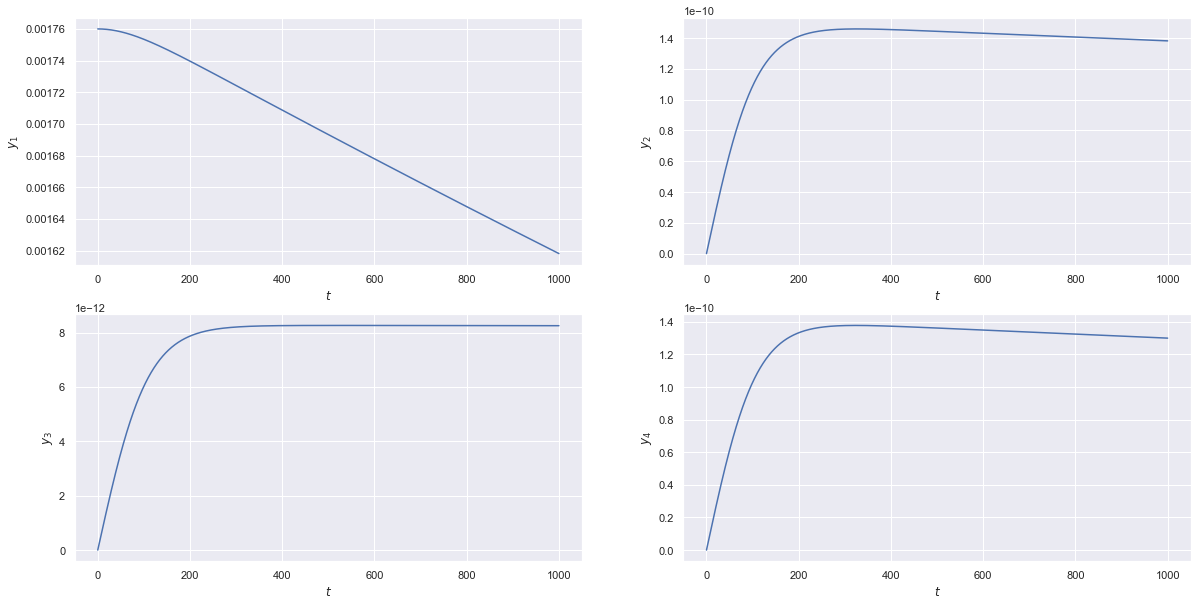

In [2]:
make_plots(RK2, 1000, 0.1)

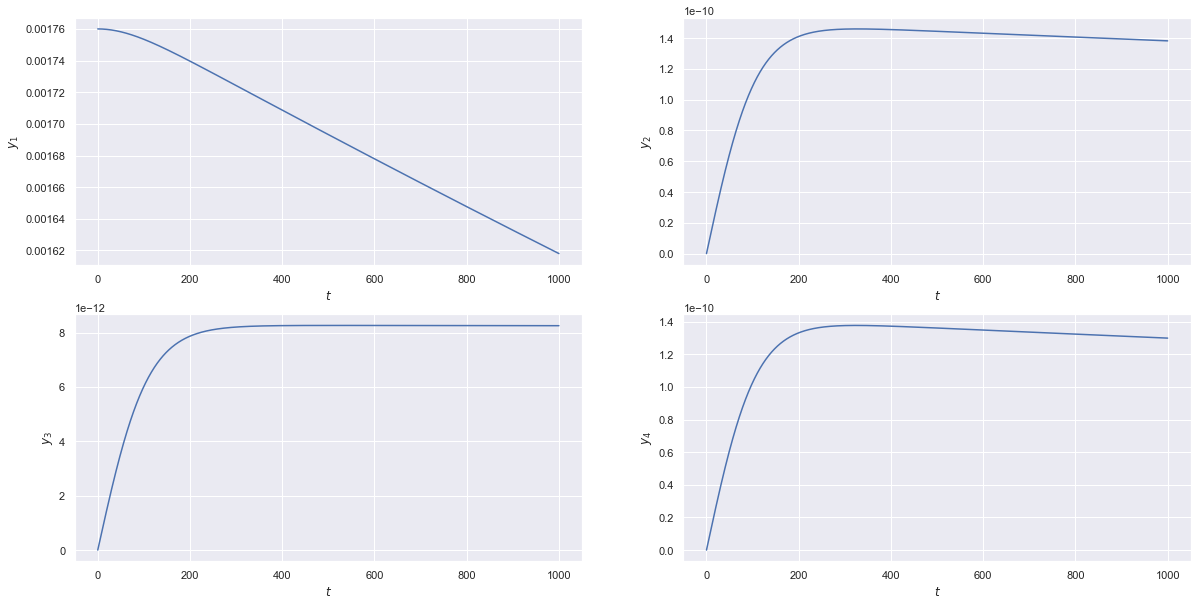

In [3]:
make_plots(RK3, 1000, 0.1)

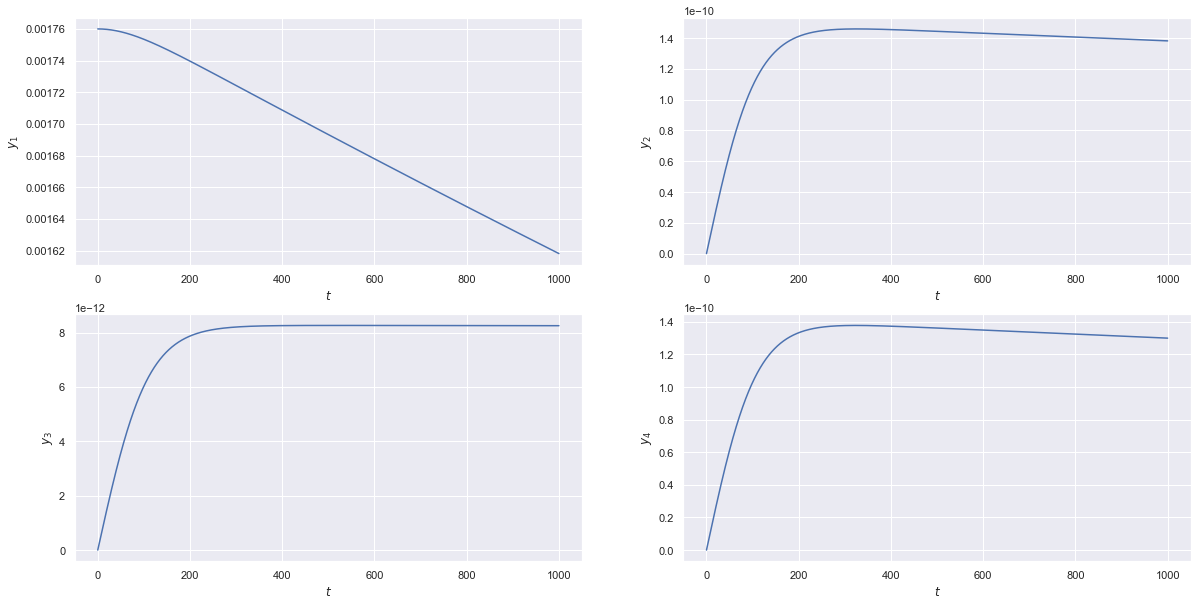

In [4]:
make_plots(FDN2, 1000, 0.1)

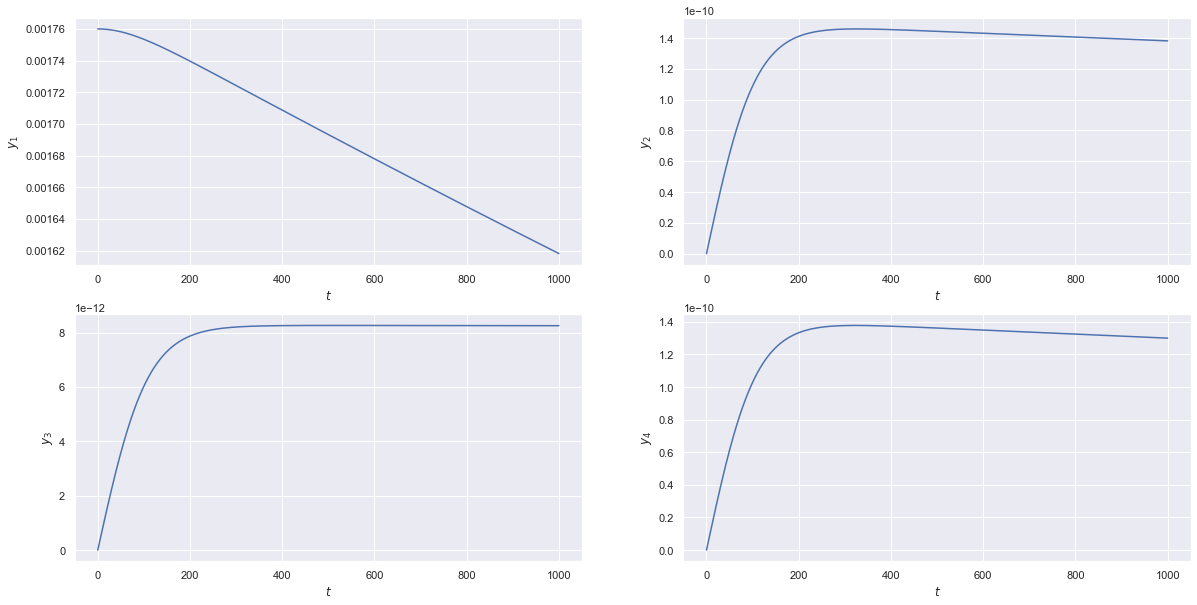

In [5]:
make_plots(FDN3, 1000, 0.1)

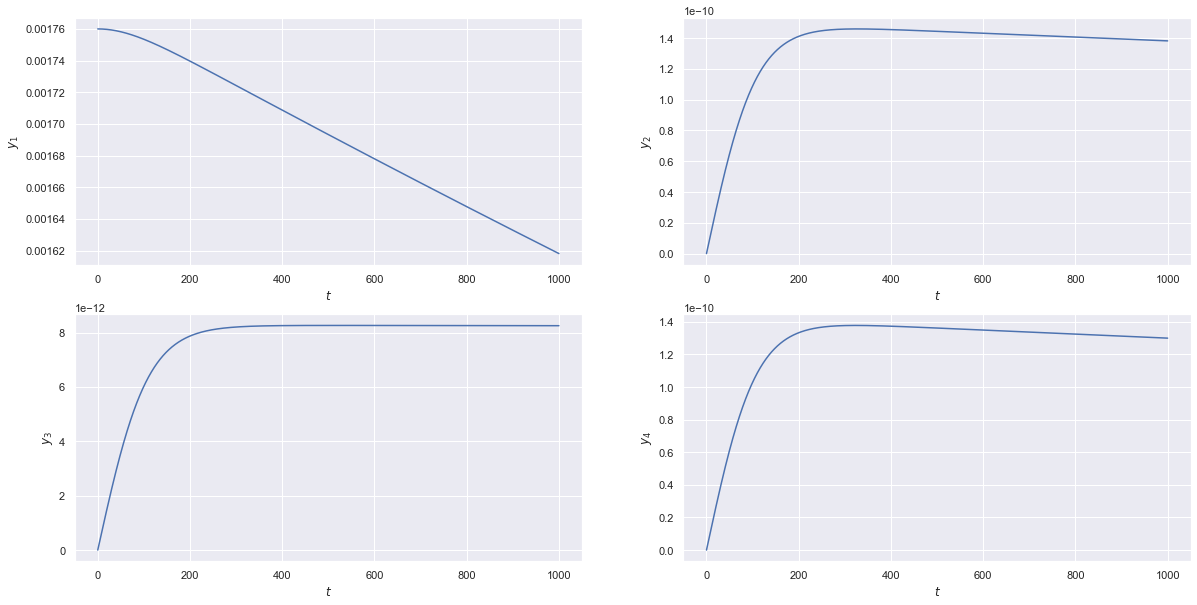

In [6]:
make_plots(FDN4, 1000, 0.1)

#### 3) Построим графики решений метода ФДН 4 порядка на разных интервалах: $T_{k} = 10^{6}$, $T_{k} = 10^{9}$, $T_{k} = 10^{13}$ с шагом $ℎ = 0.1$.

In [41]:
make_plots(FDN4, 10**(6), 0.1)

KeyboardInterrupt: 

Было желание отстроить графики с шагом 0.1 и для $10^{9}$, $10^{13}$. Но прошлый график строился больше 2 часов. Построение с большим шагом нарушит устойчивость.

#### 4) Ответ на вопрос про переформулировку "постановки задачи": 

При решении дифференциальных уравнений, описывающих протекание химических реакций, обычно (чаще всего) решение представляет собой функцию экспотенты, где под экспонентой стоит время. Поэтому, стоит сделать следующую замену:
$$\tau = ln(t)$$
$$y(t) = y(e^{\tau})$$
$$\dot{y} = \dot{y}e^{-\tau}$$

Этой же заменом мы решим проблему маленьких значений концентраций, потому что они уже будут зависеть от логарифма времени.

#### 5) Невязки. Не совсем понятно, как искать эталонное точное решение нашей системы, поэтому будем искать невязки относительно метода ФДН 4 порядка аппроксимации.

Функция поиска невязок написана в файле functions.py:

Невязки ФДН 2 и 3 порядков аппроксимации:

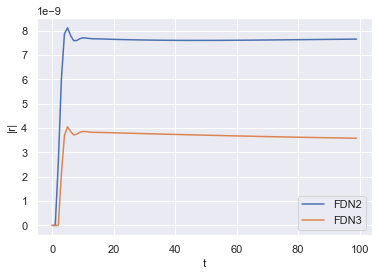

In [7]:
methods_dict = {'FDN2': FDN2, 'FDN3': FDN3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 100, 1)

Вывод 1: ФДН 3 порядка аппроксимации ближе к "эталонному" решению системы. 

Невязки ФДН 2 порядка аппроксимации и невязки Рунге-Кутты 2 и 3 порядка аппроксимации:

Функция поиска невязок:

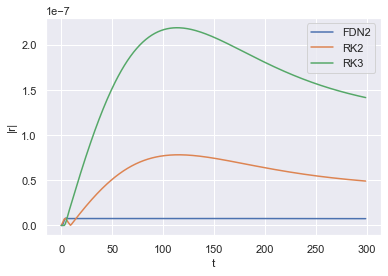

In [8]:
methods_dict = {'FDN2': FDN2, 'RK2': RK2, 'RK3': RK3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 300, 1)

Вывод 2: Методы в порядке возрастания невязки:
ФДН 2 порядка аппроксимации, Рунге-Кутты 2 порядка аппроксимации, Рунге-Кутты 3 порядка аппроксимации. Таким образом, из упомянутых трех методов метод Рунге-Кутты 3 порядка аппроксимации лучше всех приближает "точное" решение системы уравнений.

Невязки ФДН 3 порядка аппроксимации и невязки Рунге-Кутты 2 и 3 порядка аппроксимации:

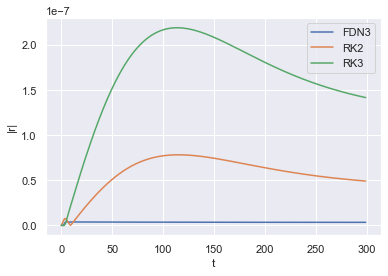

In [9]:
methods_dict = {'FDN3': FDN3, 'RK2': RK2, 'RK3': RK3, 'FDN4': FDN4}
make_plots_nevyazka(methods_dict, 300, 1)

Вывод 3: Методы в порядке возрастания невязки:
ФДН 3 порядка аппроксимации, Рунге-Кутты 2 порядка аппроксимации, Рунге-Кутты 3 порядка аппроксимации. Таким образом, из упомянутых трех методов метод Рунге-Кутты 3 порядка аппроксимации лучше всех приближает "точное" решение системы уравнений

#### 6) Функции устойчивости и устойчивость:

ФДН 2 порядка аппроксимации:
$$z(R) = \frac{3}{2} - \frac{2}{R} + \frac{1}{2R^{2}}$$
ФДН 3 порядка аппроксимации:
$$z(R) = \frac{\frac{11}{6}R^{3} - 3R^{2} + \frac{3}{2}R -\frac{1}{3}}{R^{3}}$$
ФДН 4 порядка аппроксимации:
$$z(R) = \frac{\frac{25}{12}R^{4} - 4R^{3} + 3R^{2} - \frac{4}{3}R + \frac{1}{4}}{R^{4}}$$

Граница области устойчивости |𝑅(𝑧)| = 1 определяется выражением |𝑅| = $e^{i\theta}$. Область, вне полученной фигуры - область устойчивости. 

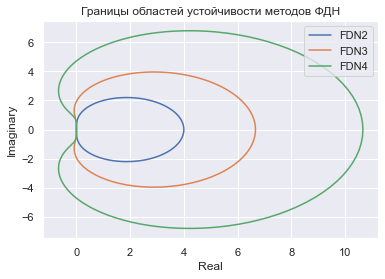

In [10]:
theta = np.array([complex(0,np.pi * i) for i in np.arange(0,2,0.01)])
R = np.exp(theta)
border = [3/2 - 2/R + 1/(2*R**2), (11/6*R**3 - 3*R**2 + 3/2*R - 1/3)/R**3, (25/12 * R**4 - 4 * R**3 + 3 * R**2 - 4/3 * R + 1/4)/R**4]
for i in range(len(border)):
    plt.plot(border[i].real, border[i].imag, label=f'FDN{i+2}')
    plt.title('Границы областей устойчивости методов ФДН')
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.legend()
plt.show()

Вывод 4: Для метода ФДН 2 вся левая полуплоскость {(x,y): x< 0} находиться в области устойчивости, поэтому метод является А-устойчивым. ФДН 3 порядка аппроксимации не является А-устойчивым. ФДН 4 порядка аппроксимации не является А-устойчивым

Методы Рунге-Кутты:
$$R(z) = \frac{det(E - zA + zeb^{T})}{det(E-zA)}$$

Устойчивость метода Рунге-Кутты 2 порядка аппроксимации. Белая область - область абсолютной устойчивости.

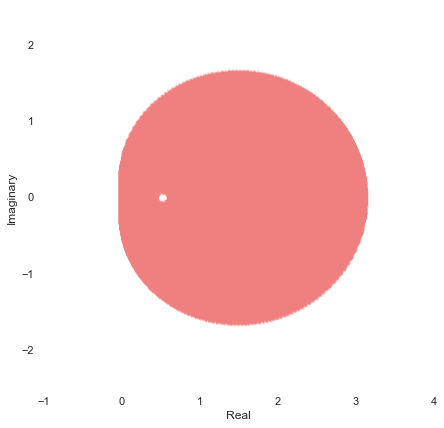

In [11]:
mA = np.array([[(1 + math.sqrt(2)) / 2, 0], [-math.sqrt(2), (1 + math.sqrt(2)) / 2]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [], []
fig = plt.figure(figsize = (7, 7))
x, y, c = [], [], []
for i in range(-100, 400):
    for j in range(-250, 250):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(mE - z*mA + z*mB)/np.linalg.det(mE - z*mA))
        x.append(i / 100)
        y.append(j / 100)
        if (R > 1):
            c.append("lightcoral")
        else:
            c.append("white")

plt.scatter(x, y, color = c)
plt.xlim(-1, 4)
plt.ylim(-2.5, 2.5)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

Устойчивость метода Рунге-Кутты 3 порядка аппроксимации:

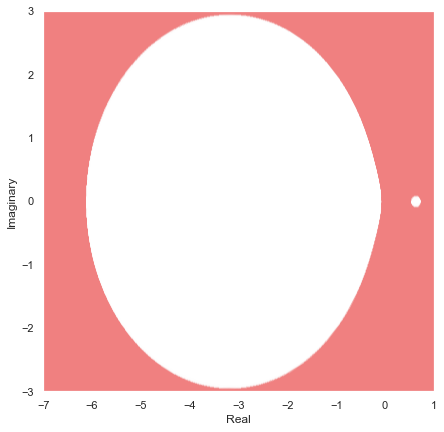

In [12]:
mA = np.array([[(3 + math.sqrt(3)) / 6, 0], [-math.sqrt(3), (3 + math.sqrt(3)) / 6]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [], []
fig = plt.figure(figsize = (7, 7))
x, y, c = [], [], []
for i in range(-700, 100):
    for j in range(-300, 300):
        z = complex(i / 100, j / 100)
        R = abs(np.linalg.det(mE - z*mA + z*mB) / np.linalg.det(mE - z*mA))
        x.append(i / 100)
        y.append(j / 100)
        if (R > 1):
            c.append("lightcoral")
        else:
            c.append("white")

plt.scatter(x, y, color = c)
plt.xlim(-7, 1)
plt.ylim(-3, 3)
plt.xlabel("Real")
plt.ylabel("Imaginary")
plt.show()

Вывод 5: Метод Рунге-Кутты 2 порядка аппроксимации является А устойчивым, а 3 порядка не является

L-устойчивыми могут быть только ФДН 2 порядка аппроксимации и метод Рунге-Кутты 2 порядка аппроксимации, потому что необходимое условие L-устойчивости - А-устойчивость.

Условие L-устойчивости:
$$|R(z)| \rightarrow 0 при Re(z)  \rightarrow \inf  $$

ФДН 2 порядка аппроксимации:

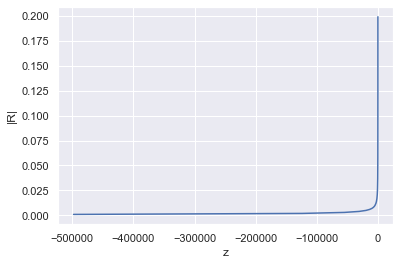

In [16]:
N = 200
z, R, h = [0] * N, [0] * N, 0.001
for i in range(1, N):
    R[i] = i * h
    z[i] = ((3 / 2 * R[i] ** (2) - 2 * R[i] + 1 / 2) / R[i] ** (2))
z = z[1:]
R = R[1:]
plt.plot(-np.array(z), R)
plt.xlabel("z")
plt.ylabel("|R|")
plt.show()

Вывод 6: ФДН 2 порядка аппроксимации L-устойчив

Метод Рунге-Кутты 2 порядка аппроксимации:

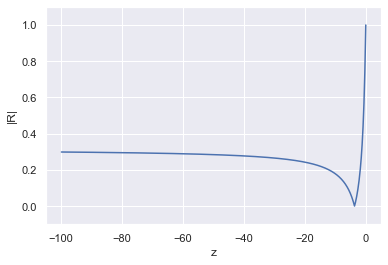

In [15]:
mA = np.array([[(1 + math.sqrt(2)) / 2, 0], [-math.sqrt(2), (1 + math.sqrt(2)) / 2]])
mE = np.array([[1, 0], [0, 1]])
mB = np.array([[1 / 2, 1 / 2], [1 / 2, 1 / 2]])
z, R = [],[]
for i in range(0, 1000):
    z.append(-i / 10)
    R.append(abs(np.linalg.det(mE - z[i] * mA + z[i] * mB) / np.linalg.det(mE - z[i] * mA)))

plt.plot(z, R)
plt.ylim(-0.1, 1.1)
plt.xlabel("z")
plt.ylabel("|R|")
plt.show()

Вывод 7: Метод Рунге-Кутты 2 порядка аппроксимации не является L-устойчивым

#### Общие выводы по задаче: 

1) ФДН 3 порядка аппроксимации ближе к "эталонному" решению системы, при сравнении с ФДН 2 порядка аппроксимации. 

2) При сравнении методов: Рунге-Кутты 3 порядка аппроксимации, ФДН 2 порядка аппроксимации, Рунге-Кутты 2 порядка аппроксимации выявили, что метод ФДН 2 порядка аппроксимации лучше всех приближает "точное" решение системы уравнений.

3) При сравнении методов: Рунге-Кутты 3 порядка аппроксимации, ФДН 3 порядка аппроксимации, Рунге-Кутты 2 порядка аппроксимации выявили, что ФДН 3 порядка аппроксимации лучше всех приближает "точное" решение системы уравнений. 

4) ФДН 2 порядка аппроксимации является А-устойчивым. Однако, ФДН 3 и 4 порядка аппроксимации не является А-устойчивым. 

5) Метод Рунге-Кутты 2 порядка аппроксимации является А устойчивым, а 3 порядка не является. 

6) ФДН 2 порядка аппроксимации L-устойчив. А Метод Рунге-Кутты 2 порядка аппроксимации не является L-устойчивым